In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('algerain dataset.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(columns=['day','month','year'],inplace=True)


In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
X=df.drop(columns=['FWI'])
y=df['FWI']

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
xtrain.shape,xtest.shape

((194, 11), (49, 11))

In [24]:
k=xtrain.corr()
k

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [30]:
def abc(k,threshold):
    colnams=set()
    for col1 in k.columns:
        for col2 in k.columns:
            if col1!=col2 and abs(k[col1][col2])>threshold:
                colnams.add(col1)
    return colnams
colnams=abc(k,0.95)

In [31]:
xtrain.drop(columns=colnams,inplace=True)
xtest.drop(columns=colnams,inplace=True)


In [33]:
xtrain.shape,xtest.shape

((194, 9), (49, 9))

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrainscaled=sc.fit_transform(xtrain)
xtestscaled=sc.transform(xtest)
xtrainscaled,xtestscaled

(array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
         -1.14434427, -1.01036297],
        [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
          0.8738629 ,  0.98974332],
        [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
          0.8738629 ,  0.98974332],
        ...,
        [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
         -1.14434427, -1.01036297],
        [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
          0.8738629 ,  0.98974332],
        [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
         -1.14434427, -1.01036297]]),
 array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
          0.25303529,  0.17532762,  0.8738629 , -1.01036297],
        [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
         -0.41556406,  0.33729694,  0.8738629 , -1.01036297],
        [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
         -0.85728135, -0.86

Text(0.5, 1.0, 'afrer scaling')

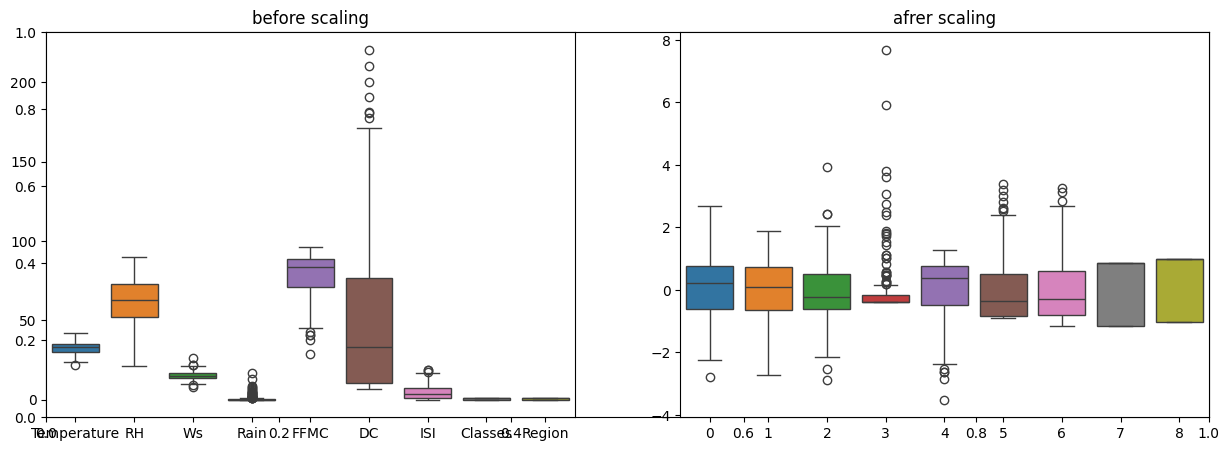

In [36]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=xtrain)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=xtrainscaled)
plt.title('afrer scaling')

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(xtrainscaled,ytrain)
ypred=reg.predict(xtestscaled)
m=mean_absolute_error(ytest,ypred)
r=r2_score(ytest,ypred)
m,r

(0.7697679273795178, 0.9564612105162216)

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
l=Lasso()
l.fit(xtrainscaled,ytrain)
ypred=l.predict(xtestscaled)
m=mean_absolute_error(ytest,ypred)
r=r2_score(ytest,ypred)
m,r

(1.0117803862384436, 0.9429840249928635)

In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r=Ridge()
r.fit(xtrainscaled,ytrain)
ypred=r.predict(xtestscaled)
m=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
m,r2

(0.768988383086266, 0.9564096586025159)

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
e=ElasticNet()
e.fit(xtrainscaled,ytrain)
ypred=e.predict(xtestscaled)
m=mean_absolute_error(ytest,ypred)
r2=r2_score(ytest,ypred)
m,r2

(1.8384290134051158, 0.8482540371037068)

In [44]:
import pickle
pickle.dump(r,open('ridge.pkl','wb'))
pickle.dump(sc,open('scaler1.pkl','wb'))